# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.131364e+01     9.034141e+00
 * time: 0.0014681816101074219
     1     3.033155e+01     4.746994e+00
 * time: 0.005949974060058594
     2     1.964168e+01     4.004137e+00
 * time: 0.012607097625732422
     3     1.484159e+01     3.248898e+00
 * time: 0.019013166427612305
     4     1.325155e+01     4.648760e+00
 * time: 0.02466106414794922
     5     1.118198e+01     1.840583e+00
 * time: 0.031905174255371094
     6     9.686497e+00     2.578201e+00
 * time: 0.03772711753845215
     7     8.910997e+00     1.301832e+00
 * time: 0.04388713836669922
     8     8.674462e+00     1.077108e+00
 * time: 0.05021214485168457
     9     8.539827e+00     1.201133e+00
 * time: 0.05681610107421875
    10     8.359809e+00     8.256220e-01
 * time: 0.06319618225097656
    11     8.216223e+00     5.475277e-01
 * time: 0.06954813003540039
    12     8.163378e+00     1.023753e+00
 * time: 0.07473206520080566
    13     8.137186e+00     6.724755e-01
 *

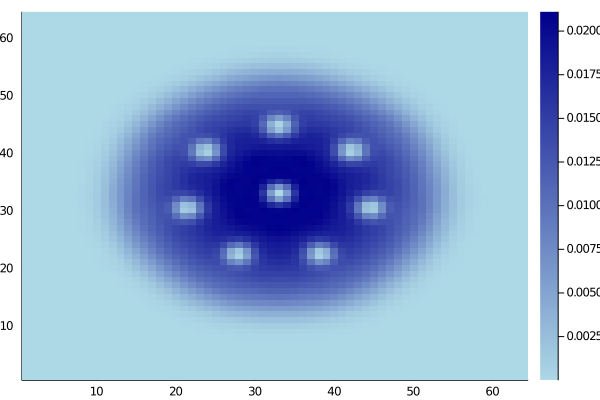

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)